### Import Resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Read and display image

In [3]:
# Read in the image
image = cv2.imread('resources/img4.png')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (687, 1024, 3)


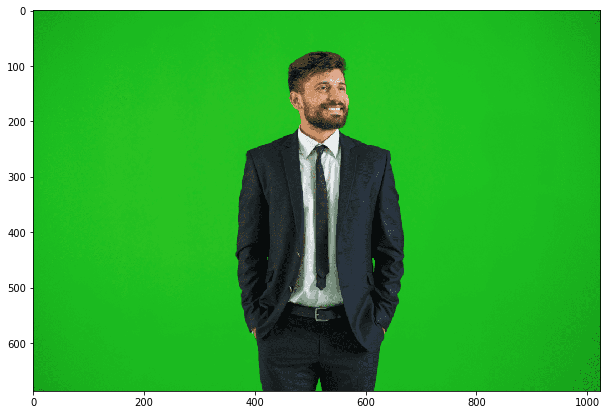

In [4]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.figure(figsize=(14, 7))
plt.imshow(image_copy)

### Define the color threshold

In [10]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_green = np.array([0,155,0]) 
upper_green = np.array([90,255,90])

### Create Mask

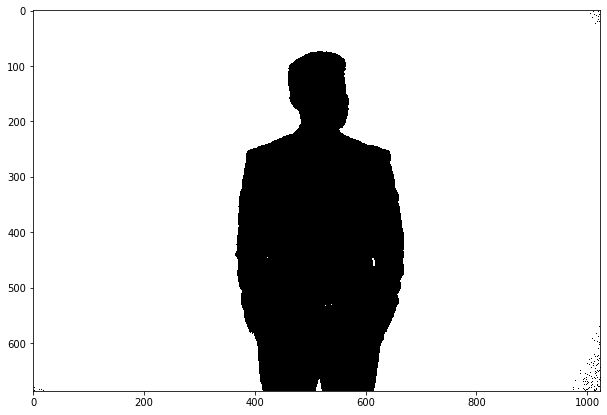

In [11]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_green, upper_green)

# Vizualize the mask
plt.figure(figsize=(14, 7))
plt.imshow(mask, cmap='gray')

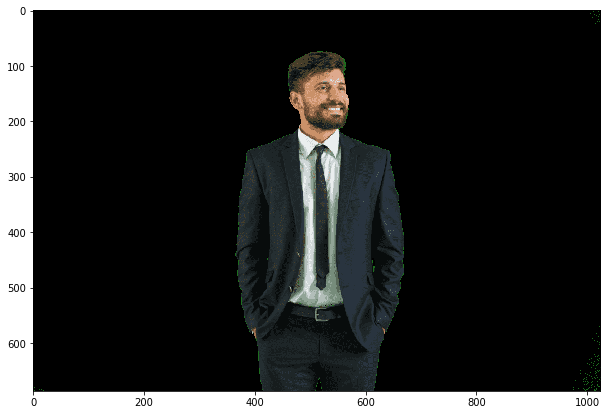

In [12]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.figure(figsize=(14, 7))
plt.imshow(masked_image)

### Mask and add Background image

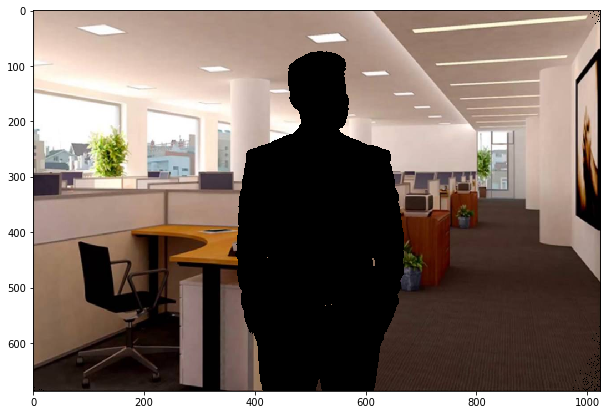

In [13]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('resources/img3.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = cv2.resize(background_image, (1024, 687))
# background_image[0:1920,0:720]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.figure(figsize=(14, 7))
plt.imshow(crop_background)

### Create a complete image

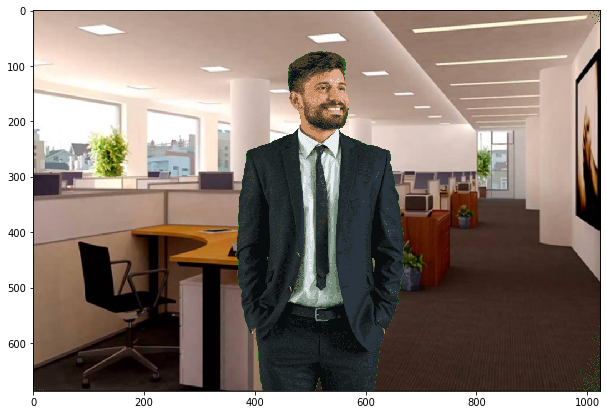

In [14]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.figure(figsize=(14, 7))
plt.imshow(complete_image)